## IA PROJECT ##

### Attribute and object selection ###

Through this study, we chose to select a subset on a big databank on http://databank.worldbank.org. With this dataset, we want to determine the level of development of differents country thanks to our AI. To do that we first choose different attributes that could bring some informations to our model. 

We first load all packages we will need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import numpy as np
import seaborn
from outliers import smirnov_grubbs as grubbs


We start with the import of our dataframe, and we adapt it for our study

In [3]:
originial_df = pd.read_csv("data5.txt", sep="\t")
originial_df.drop(["Country Code", "Time Code","Time"], axis=1, inplace = True)
originial_df.set_index("Country Name", inplace = True)
originial_df[originial_df == ".."] = np.nan
df = originial_df.copy().astype(np.float64)


### NaN purification

We can see there are many NaN : We can choose first to eliminate country with many NaN data (over 50% for example) that can bring the outlier. But that value can be choosing with the following graphic

                                                  NaN_count
Net migration                                             5
Life expectancy at birth, total (years)                  16
GDP per capita (current US$)                             13
Urban population (% of total population)                  7
Access to electricity (% of population)                   6
Individuals using the Internet (% of population)         19


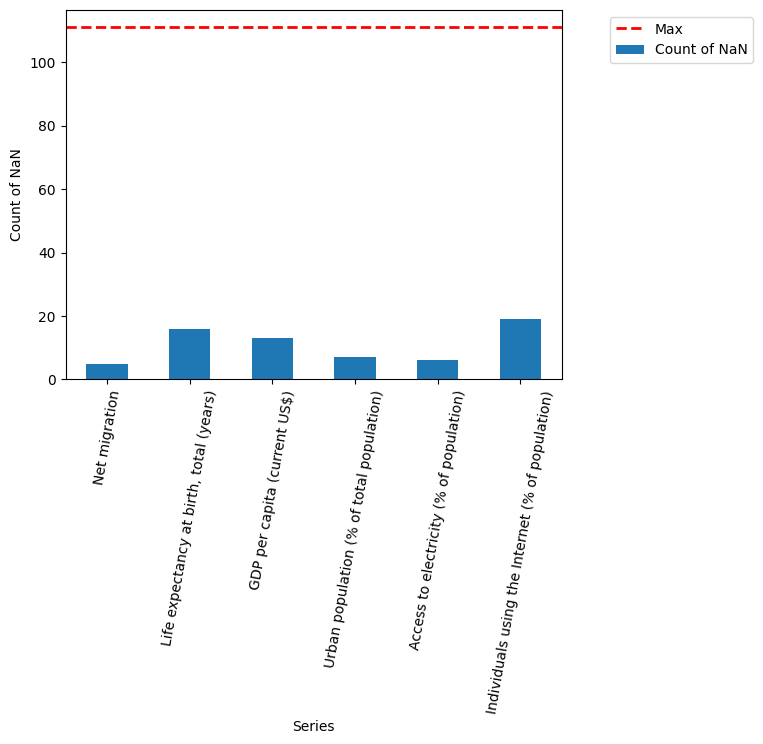

In [15]:
df_nb_nan = dm.make_na_count(df,True); print(df_nb_nan)
df_nb_nan["Series"] = df_nb_nan.index
df_nb_nan.plot.bar(y="NaN_count", x = "Series",  label="Count of NaN", rot=80)
max_nan = df.shape[0]*0.5
plt.axhline(max_nan, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.ylabel("Count of NaN")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

So we delete all series with more that 50% of data corresponding to NaN values, meaning that the attributes don't bring enough information to be interesting. Here, all attributes are kept.

In [20]:
df_without_na_series = dm.del_many_na_series(df, df_nb_nan, max_nan)

Now, we will check if some country still go NaN values ;

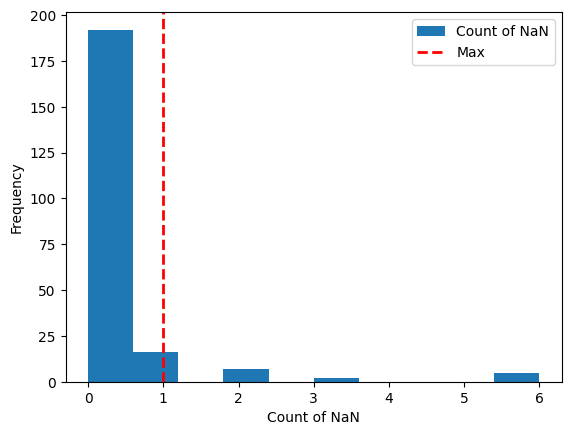

In [22]:
df_nb_nan_s = dm.make_na_count(df,False)
df_nb_nan_s["Series"] = df_nb_nan_s.index 
df_nb_nan_s.plot.hist(y="NaN_count",  label="Count of NaN")
max_nan_s = 1
plt.axvline(max_nan_s, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.xlabel("Count of NaN")
plt.legend(loc='upper right')

Few country has been removed because still presence of NaN values. 

In [23]:
df_without_na_country = dm.del_many_na_country(df_without_na_series, df_nb_nan_s, max_nan_s);df_without_na_country

,Net migration,"Life expectancy at birth, total (years)",GDP per capita (current US$),Urban population (% of total population),Access to electricity (% of population),Individuals using the Internet (% of population)
Country Name,,,,,,
Afghanistan,-90238.0,63.136000,520.252064,25.020,97.699997,11.000000
Albania,-10887.0,78.860000,4124.055390,58.421,99.889999,59.600000
Algeria,-36227.0,75.732000,3967.199451,71.459,99.350250,42.945527
Angola,91623.0,61.092000,1709.515534,64.149,41.813129,23.200000
Antigua and Barbuda,16.0,78.152000,15862.651663,24.846,100.000000,73.000000
...,...,...,...,...,...,...
Virgin Islands (U.S.),-526.0,79.168293,35324.974887,95.480,100.000000,59.608316
West Bank and Gaza,-22774.0,74.554000,3527.613824,75.628,100.000000,59.900000
"Yemen, Rep.",-39688.0,66.064000,1069.817122,35.394,68.859505,24.579208


But we can also replace NaN value by using a clustering estimation with K nearest neighbours methods. But we decided don't do it, because it could change the behaviour to our data, and after few try, we did not had convincing result.

### Correleted data

We will now check about coreleted data with spearman method.

<AxesSubplot: >

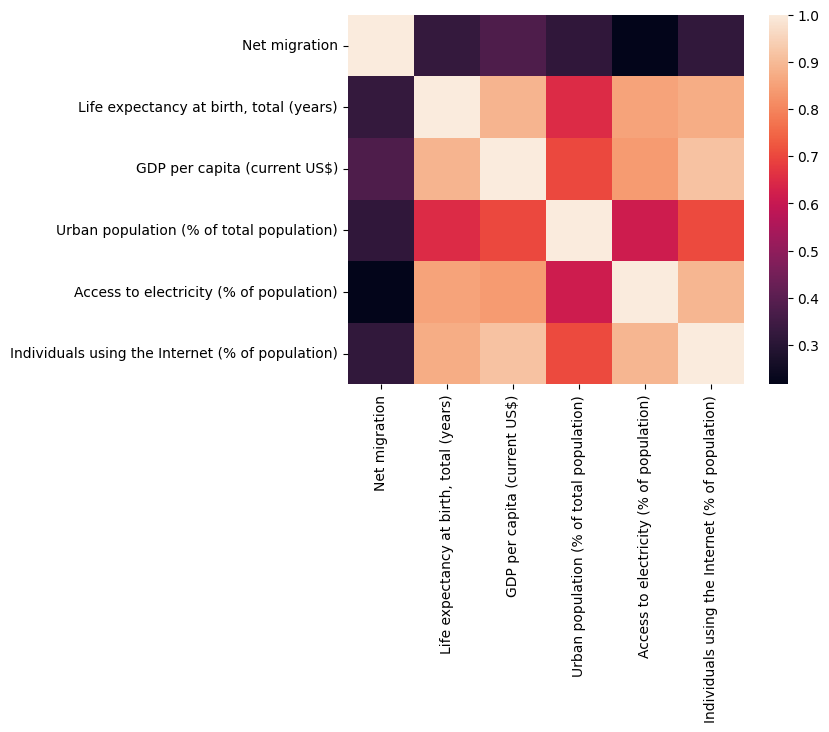

In [25]:
df_corr = df_without_na_country.corr("spearman", numeric_only = True)
seaborn.heatmap(df_corr)

We this heatmap about contengensis table establish the different possible relation, that we will delete one of the variable when there is 90% absolute correlation effect.
That will be done for both dataframe we have.

<AxesSubplot: >

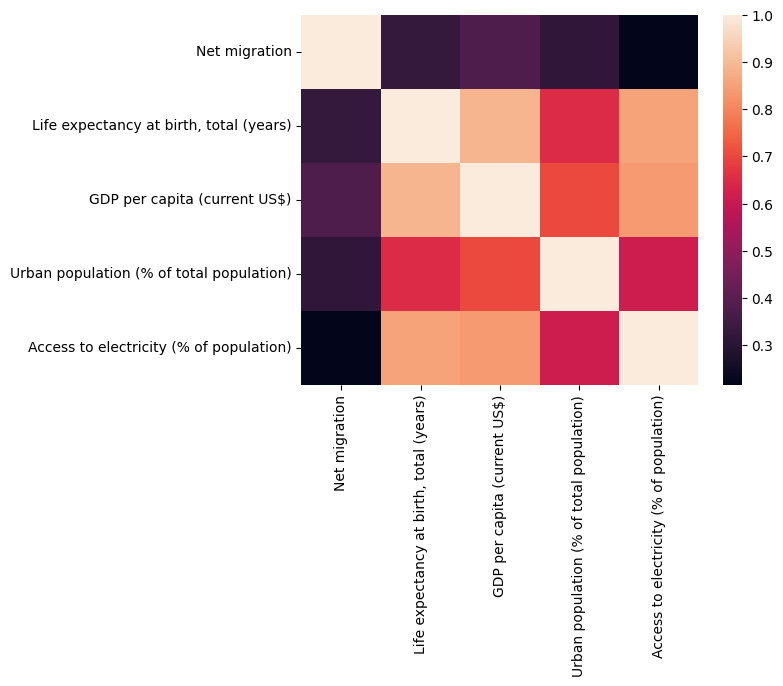

In [26]:
df_without_corr_series = dm.del_correled_series(df_without_na_country, df_corr,0.90)
corr_clean = df_without_corr_series.corr("spearman")
seaborn.heatmap(corr_clean)

We see that acces to individuals using internet has been deleted because of its correlation with acces to eletricity. That seems logical, because internet use depends of the acces of eletricity, and most of the time, when eletricity is accessible, internet is also.

### Normalization of data with z-score

At this step, all data that we considered as useless (with NaN values, or correlated data) have deleted. Because of the variety of our variable units, but also order of magnitude. We should normalize ours. After some research and also internal tries, we saw that normalized data brings much more information for clustering and classification.

To make easier the use of our data, we create csv files countening it.

In [27]:
n_df = dm.normalize_df(df_without_corr_series)
dm.export_clean_data(df_without_corr_series)
dm.export_clean_data(n_df,"normalized_clean_dataframe.csv")

### Check of Outliers

To finish the evaluation of our dataset, outliers can be searched and determined first graphically, and then thanks to statistical test as the grubbs test

<AxesSubplot: >

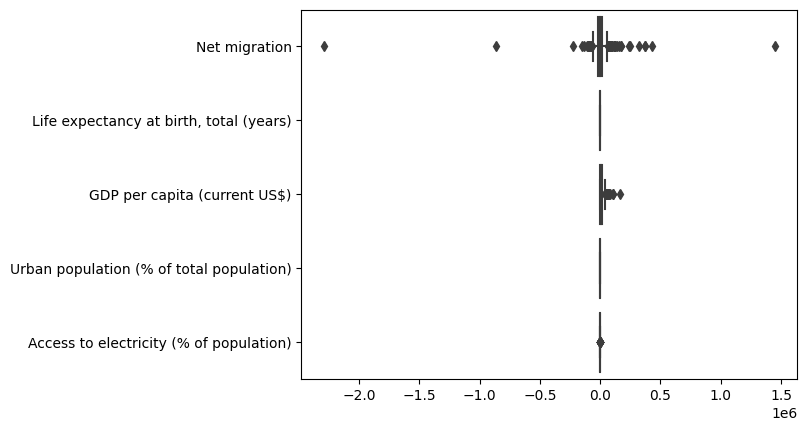

In [28]:
seaborn.boxplot(data=df_without_corr_series, orient = "h")

We can see on the plot that there are some outliers on the net migration, and also for GDP per capita. We can check thanks to the grubbs text, how much there are, that is significant.

We have found 3 outliers in the series : Net migration
We have found 0 outliers in the series : Life expectancy at birth, total (years)
We have found 6 outliers in the series : GDP per capita (current US$)
We have found 0 outliers in the series : Urban population (% of total population)
We have found 0 outliers in the series : Access to electricity (% of population)


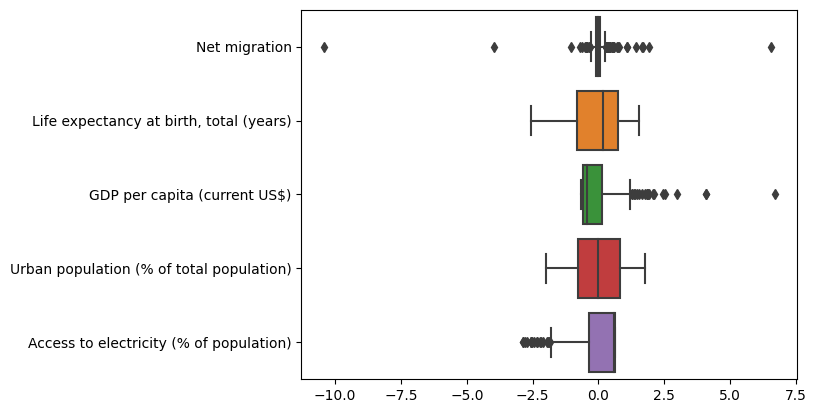

In [29]:
seaborn.boxplot(data=n_df, orient = "h")

outliers_data = {}
for serie in n_df:
    val = np.array(n_df[serie])
    outl = grubbs.max_test_indices(val, alpha=0.05) + grubbs.max_test_indices(-val, alpha=0.05)
    print(f"We have found {len(outl)} outliers in the series : {serie}")
    outliers_data[serie] = outl

So, the grubbs test give us 9 outliers on our subdataset. We chose to don't change the reality of our data and so, to not delete them. But we are making an other dataframe, where we will delete them. Then, both dataframes will be compared, to see if the impact of the outliers are too significant, and then choose or not to use the dataframe with, ou without these point for clusturing or classification.

To make the new dataframe without outliers we do :

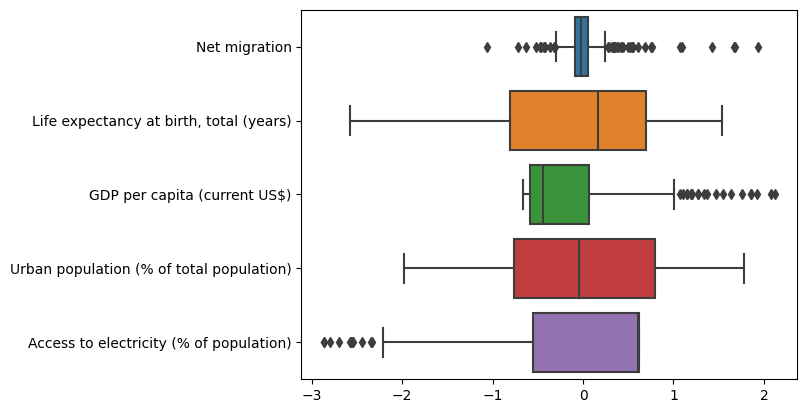

In [30]:
n_df_wo_outliar = n_df.copy()
for series in outliers_data.values():
    for val in series:
        try:
            n_df_wo_outliar.drop(df_without_corr_series.iloc[val].name, axis = 0, inplace=True)
        except KeyError:
            pass

seaborn.boxplot(data=n_df_wo_outliar, orient = "h")
dm.export_clean_data(n_df_wo_outliar,"normalized_clean_dataframe_wo_outlier.csv")


So we have 3 differents subsets based a bigger dataframe (on a databank). We will start to study this dataset by making clustering of our data, and search if we can see differents level of development thanks to our attributes. We will then try to do a classification on this dataset (that will be on another notebook).